In [39]:
import snowflake.connector
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

In [40]:
# Connect to Snowflake
ctx = snowflake.connector.connect(
    user='SGELE',
    password='Mamamamyte2001',
    account='OMSGXIZ-PZ98304',
)

# SQL query for Covid sympthoms
query = '''
select * from MORE_DATA.PROD.COVID_SYMPTHOMS;
'''
# Execute the query and fetch the result into a Pandas DataFrame
result = ctx.cursor().execute(query)
df = pd.DataFrame(result.fetchall(), columns=[col[0] if isinstance(col, tuple) else col for col in result.description])

In [41]:
columns_to_drop = ['COUNTRY', 'CONTACT_DONT_KNOW', 'CONTACT_NO', 'CONTACT_YES']
X = df.drop(columns=columns_to_drop)
y = df['CONTACT_YES']  # Target variable

In [42]:
# Assume 'X' feature matrix (symptoms) and 'y' is  target variable (contact)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6660195707070707


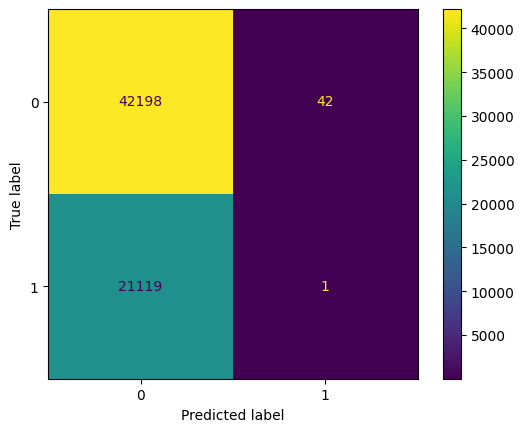

In [44]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6660195707070707
Precision: 0.023255813953488372
Recall: 4.734848484848485e-05


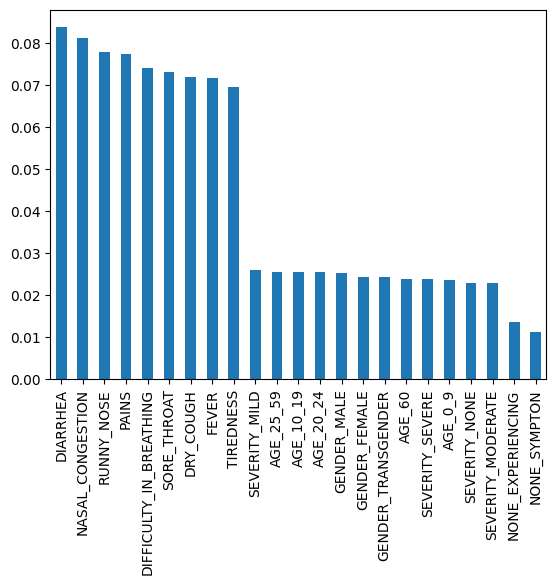

In [46]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();